<a href="https://colab.research.google.com/github/hsaar/Python25Study/blob/main/03_01_k%EC%B5%9C%EA%B7%BC%EC%A0%91%EC%9D%B4%EC%9B%83%ED%9A%8C%EA%B7%80%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# 이번에는 겨울에 대방어철로 방어 주문이 크게 늘어서 MBC마켓에서 업계최초로 농어를 무게 단위로 판매하려함
# 무게 단위로 판매를 하면 가격 측정도 원활하고 고객도 합리적으로 판단 할 것
# 그런데 공급처에서 생선 무게를 잘못 측정해서 보낼 수도 있다

# 방어의 무게를 재측정해야 한다
# 다른 데이터는 정상범위가 있으니 예측할 수 있을까
# 이렇게 예측하는 것을 회귀라고 한다
# 샘플 데이터가 필요하겠군!
# 외부에서 56개의 샘플을 받아서 처리해보자
# 지도학습은 크게 2가지로 나뉜다

# 분류(2진분류) : from sklearn.neighbors import KNeighborsClassifier
# 회귀(예측 : 확률(임의의 어떤 숫자로 예측) : from sklearn.neighbors import KNeighborsRegressor)
# 회귀 : 두 변수 사이에 상관관계를 분석하는 방법

In [16]:
# 리눅스 명령어로 코랩의 가상머신에 나눔폰트를 설치하고 적용하는 명령어
# 차트에 한글처리용
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [17]:
# 대방어의 샘플자료 56개
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0]) # 대방어의 길이 배열리스트
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0]) # 대방어의 무게 배열리스트

기초자료


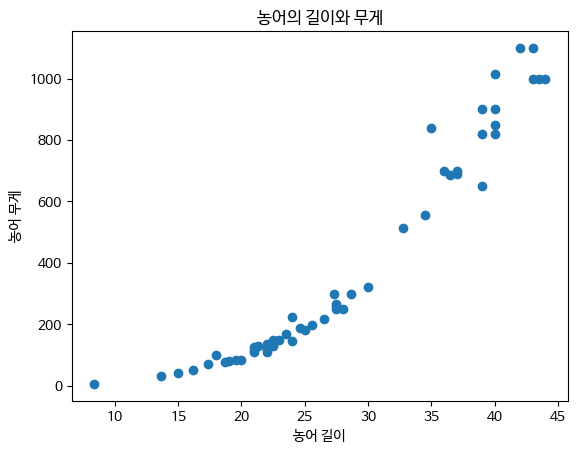

In [18]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

plt.scatter(perch_length, perch_weight)
plt.xlabel('농어 길이')
plt.ylabel('농어 무게')
print('기초자료')
plt.title('농어의 길이와 무게')
plt.show()

# 산점도를 그리고 나니 길이가 커짐에 따라 무게도 늘어남
# 이 데이터를 토대로 훈련(.fit)과 테스트(.score)를 진행해보자

In [19]:
# k-최근접 이웃 알고리즘에서의 회귀 KNeighborsRegressor

# 예측하려는 샘플에 가장 가까운 샘플 k개를 선택한다.
# 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측함
# k=3이라고 가정하면 2개의 다수가 있어 분류는 사각형으로 판단
# 회귀는 샘플에 가장 가까운 샘플 k개를 선택
# 타깃값 100, 80, 60을 더해 3으로 나눈 평균이 타깃 값으로 사용됨

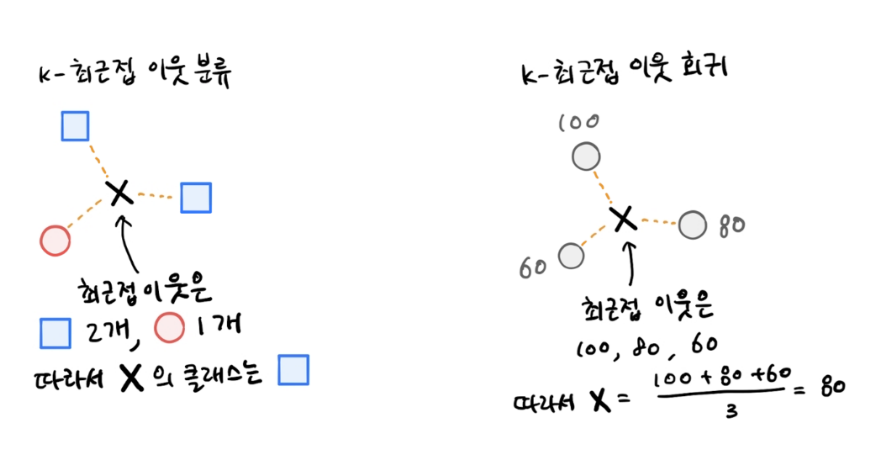

In [20]:
# 사이킷런에서 제공하는 훈련세트, 테스트세트 생성

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight, random_state=42)

# stratify 사용하지 않음(분류용) -> 정답파일이 무게 확율이기 때문에

# 사이킷 런의 trian_test_split 함수를 사용해 훈련세트와 테스트 세트로 나눔
# random_state=42 서로 같은 테스트를 위해 시드값 제공
# 사이킷 런에 사용할 훈련 세트는 2차원 배열을 사용함

# perch_length개 1차원 배열이기 때문에 이를 나눈 train_input과 test_input도 1차원 배열임
# [3,] -> [3,1] 2차원 배열을 사용해야 함으로 억지로 변환 reshape() 메서드 활용 (4,) -> (2,2)


In [21]:
test_array = np.array([1,2,3,4])
print(test_array.shape) # 현재 1차원 배열로 나오는데 이것을 억지로 2차원 배열 처리 해야함

(4,)


In [22]:
test_array = test_array.reshape(2, 2) # 억지로 2차원 배열로
print(test_array.shape)
print('='*50)
print(test_array)
# 전에는 2개의 특성으로 사용했었기 때문에 열이2개인 2차원 배열을 사용했지만 이번에는 특성이 1개이기 때문데 2차원 배열을 만들어야함 -> np, reshape() 활용
# (4,) -> (2,2) 크기로 바꿔줌


(2, 2)
[[1 2]
 [3 4]]


In [23]:
# 입력데이ㅓ인 train)input 과 test_input을 2차원으로
# train_input (42,) -> (42,1) -> train_input.reshape(42,1)
# 넘파이는 배열의 크기를 자동으로 지정하는 기능도 제공 (-1)값을 넣으면 된다

train_input = train_input.reshape(-1,1) # -1 지정하면 원소 갯수로 모두 채우라는 의미
                                        # 1은 두번 째 크기를 1로
test_input = test_input.reshape(-1,1)   # -1을 사용하면 매번 원소의 크기를 외우지 않아도 됨
print(train_input.shape,test_input.shape)

(42, 1) (14, 1)


In [24]:
print(train_input) # 전처리 끝

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]


In [25]:
from sklearn.neighbors import KNeighborsRegressor # 회귀 알고리즘용

knr = KNeighborsRegressor()

knr.fit(train_input,train_target)

KNeighborsRegressor()

In [26]:
knr.score(test_input,test_target)
#     방어 테스트길이, 테스트무게
# 분류의 경우는 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율(정확도) -> 예측값

# 회귀인 경우에는 평가를 결정 계수라고 함.R^2
# R^2 = 1 = ((타깃 - 예측)^2의 합) /((타킷 - 평균)^2의 합) 임
# 타깃의 평균 정도를 예측하는 수준 -> R^2는 0에 가까워지고, 예측이 타깃에 가까워지면 1에 가까운 값
# 결과 99.28%로 예측이 가능한 수준

0.992809406101064

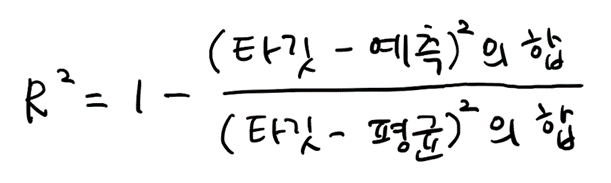

In [27]:
knr.predict([[15]]) # 알고 싶은값 출력
# k최근접한 5개의 이웃에 대한 값 99.28확률로 나온 결과 (60g)

array([60.])

In [28]:

# sklearn.metrics 패키지 아래 여러가지 측정도구를 제공함.
# mean_absolute_error절대값 오차를 평균하여 반환

from sklearn.metrics import mean_absolute_error # 평균으로 절대값의 오차를 찾는 매서드

test_predict = knr.predict(test_input) # 테스트 세트에 대한 예측

mae = mean_absolute_error(test_target, test_predict) # 테스트 세트에 대한 평균 절댓값 오차를 계산
print(mae)

19.157142857142862


In [30]:
print(knr.score(train_input, train_target)) # 훈련세트
print(knr.score(test_input,test_target)) # 테스트세트

0.9698823289099254
0.992809406101064


In [ ]:

# 위 결과를 보면 모델을 훈련 세트에 훈련하면 훈련세트에 잘 맞는 모델이 만들어짐
# 이 모델을 훈련세트와 테스트 세트에서 평가하면 두 값중에 어느 것이 높을까?

# 보통 훈련세트의 점수가 조금 더 높게 나옴
# 훈련세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁘면 과대 적합이라고 함
# 과소 적합 : 훈련세트보다 테스트세트가 점수 높아????, 두 점수가 모두 낮은 경우


In [33]:
# 사이킷 런의 알고리즘의 기본값을 3개로 조절해보자

# 사이킷 런의 k-최근접이웃 기본값이 5인데 3으로 변경
knr.n_neighbors = 3

#다시 훈련
knr.fit(train_input, train_target)

print("훈련세트 : ",knr.score(train_input, train_target))
print("테스트세트 : ",knr.score(test_input, test_target))

훈련세트 :  0.9804899950518966
테스트세트 :  0.9746459963987609


In [34]:
knr.predict([[15]]) # 15cm -> 47.3333
# 5개보다 3개를 참고하는 것이 더 좋은 결과가 나옴

array([47.33333333])

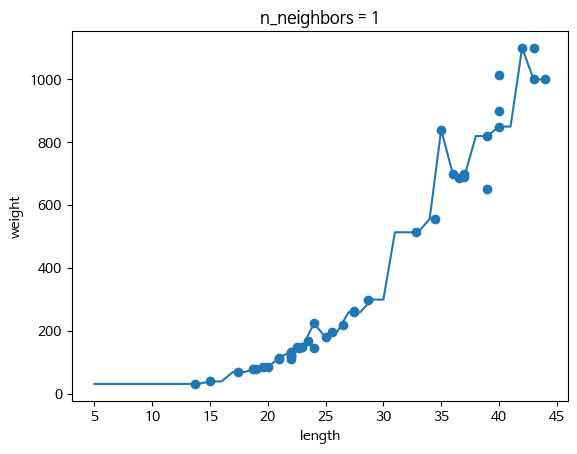

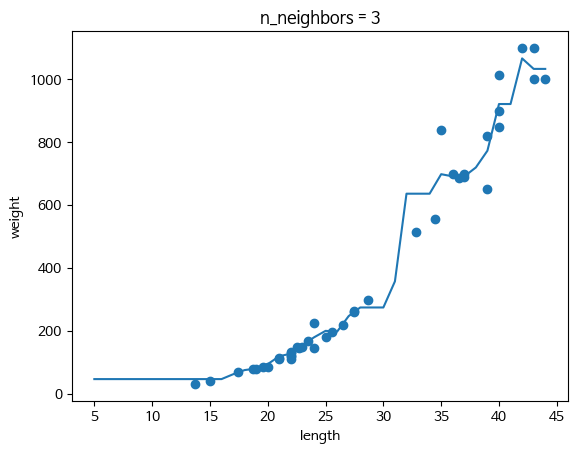

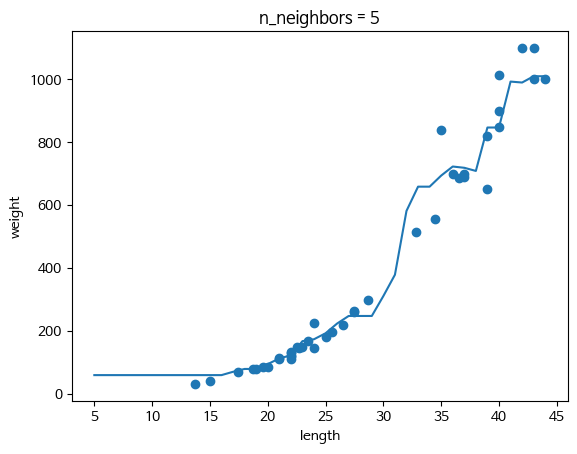

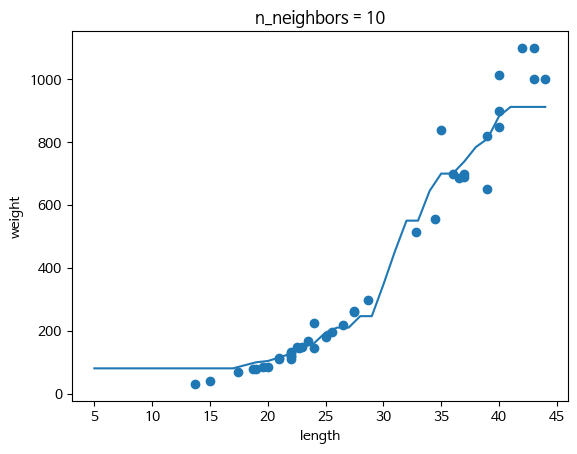

In [35]:
# 앞으로 훈련할 때 하이퍼파라미터(5->3 : 매개변수값)변경으로 좋은 결과를 결정할 때 필수가 됨
# 이것을 보고서에 남겨서 선택한 결과를 표출해야 함
# 그런데 이것을 사람이 값을 수동으로 바꿔가면서 훈련을 하면 시간 낭비가 될 수 있음으로
# 파이썬의 for문 등을 많이 사용한다.
# 하이퍼 파라미터 값은 대부분 홀수를 사용한다. (짝수인 경우에는 답이 잘 나오지 않음.)

knr = KNeighborsRegressor() # k-최근접 이웃 회귀 객체를 만듭니다
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 3, 5, 10 일 때 예측 결과를 그래프로 그린다
for n in [1,3,5,10]:
  knr.n_neighbors=n
  knr.fit(train_input,train_target)

  # 지정한 x에 대한 예측 구하기
  predict = knr.predict(x)

  plt.scatter(train_input, train_target) # 훈련 세트를 산점도로 그립니다
  plt.plot(x, predict)
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()